# Лабораторная работа 4, задача 1, вариант 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def function_of_xyz(x, y, z):
    return -y/x + (x+1)*z/x

In [ ]:
def absolute_solve(x):
    return np.exp(x) + x + 1

In [ ]:
# z = y'
def g(x, y, k):
    return k

In [ ]:
# сумма квадратов отклонений
def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

In [ ]:
# аналитическое решение
def analytical(f, a, b, h):
    x = [i for i in np.arange(a, b + h, h)]
    y = [f(i) for i in x]
    return x, y

In [ ]:
def euler(f, a, b, h, y0, z):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = z
    for i in range(n):
        k += h * f(x[i], y[i], k)
        y.append(y[i] + h * g(x[i], y[i], k))

    return x, y

In [ ]:
def runge_kutta(f, a, b, h, y0, z):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = [z]
    for i in range(n):
        k1 = h * g(x[i], y[i], k[i])
        l1 = h * f(x[i], y[i], k[i])
        k2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k1, k[i] + 0.5 * l1)
        l2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1, k[i] + 0.5 * l1)
        k3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k2, k[i] + 0.5 * l2)
        l3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2, k[i] + 0.5 * l2)
        k4 = h * g(x[i] + h, y[i] + k3, k[i] + l3)
        l4 = h * f(x[i] + h, y[i] + k3, k[i] + l3)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        k.append(k[i] + (l1 + 2 * l2 + 2 * l3 + l4) / 6)
    return x, y, k

In [ ]:
def adams(f, x, y, k, h):
    n = len(x)
    x = x[:4]
    y = y[:4]
    k = k[:4]
    for i in range(3, n - 1):
        k.append(k[i] + h * (55 * f(x[i], y[i], k[i]) -
                             59 * f(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * f(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * f(x[i - 3], y[i - 3], k[i - 3])) / 24)

        y.append(y[i] + h * (55 * g(x[i], y[i], k[i]) -
                             59 * g(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * g(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * g(x[i - 3], y[i - 3], k[i - 3])) / 24)
        x.append(x[i] + h)
    return x, y

In [ ]:
def runge_romberg(dict_):
    k = dict_[0]['h'] / dict_[1]['h']
    y1 = [yi for xi, yi in zip(dict_[0]['Euler']['x'], dict_[0]['Euler']['y']) if xi in dict_[1]['Euler']['x']]
    y2 = [yi for xi, yi in zip(dict_[1]['Euler']['x'], dict_[1]['Euler']['y']) if xi in dict_[0]['Euler']['x']]
    euler = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(y1, y2)]
    x_ex = [xi for xi in dict_[0]['Euler']['x'] if xi in dict_[1]['Euler']['x']]
    y_ex = [absolute_solve(i) for i in x_ex]
    for i in range(len(euler)):
        euler[i] = abs(euler[i] - y_ex[i])

    y1 = [yi for xi, yi in zip(dict_[0]['Runge']['x'], dict_[0]['Runge']['y']) if xi in dict_[1]['Runge']['x']]
    y2 = [yi for xi, yi in zip(dict_[1]['Runge']['x'], dict_[1]['Runge']['y']) if xi in dict_[0]['Runge']['x']]
    runge = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(y1, y2)]
    x_ex = [xi for xi in dict_[0]['Runge']['x'] if xi in dict_[1]['Runge']['x']]
    y_ex = [absolute_solve(i) for i in x_ex]
    for i in range(len(runge)):
        runge[i] = abs(runge[i] - y_ex[i])

    y1 = [yi for xi, yi in zip(dict_[0]['Adams']['x'], dict_[0]['Adams']['y']) if xi in dict_[1]['Adams']['x']]
    y2 = [yi for xi, yi in zip(dict_[1]['Adams']['x'], dict_[1]['Adams']['y']) if xi in dict_[0]['Adams']['x']]
    adams = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(y1, y2)]
    x_ex = [xi for xi in dict_[0]['Adams']['x'] if xi in dict_[1]['Adams']['x']]
    y_ex = [absolute_solve(i) for i in x_ex]
    for i in range(len(adams)):
        adams[i] = abs(adams[i] - y_ex[i])

    return {'Euler': euler, 'Runge': runge, 'Adams': adams}

In [ ]:
def show(res, pure, h):
    n = len(res)
    plt.figure(figsize=(18,9))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        plt.scatter(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4, label='Euler method')
        plt.plot(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4)
        plt.scatter(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4, label='Runge-kutta method')
        plt.plot(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4)
        plt.scatter(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4, label='Adams method')
        plt.plot(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4)
        plt.scatter(pure[i][0], pure[i][1], color='k', alpha=0.4, label='Pure function')
        plt.plot(pure[i][0], pure[i][1], linestyle='dashed', color='k', alpha=0.4)

        plt.legend(loc='best')
        plt.title('h{0} = '.format(i + 1) + str(h[i]))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
    plt.savefig('Methods.png')
    plt.show()

Вариант 17:


---


Задача Коши:
$$
xy''-(x+1)y'+y=0\\
y(1)=2+e\\
y'(1)=1+e\\
x\in{[1,2]}\\
$$
Точное решение:
$$
y = x+1+e^x
$$

In [ ]:
a = 1
b = 2
y0 = 2 + np.exp(1)
z = 1 + np.exp(1)
h = 0.1

Euler error: [0.0, 0.010969439112582968, 0.021592608379268796, 0.03149510815625689, 0.040249392168547615, 0.04736657409505174, 0.05228739358762624, 0.054372192677730524, 0.0528897500690757, 0.047004812240608373, 0.035764147762641585]
Runge error: [0.0, 1.5857183655043627e-07, 3.5049795066299794e-07, 5.810401901840123e-07, 8.561982625110431e-07, 1.1828067307817491e-06, 1.5686442624840424e-06, 2.022556612857329e-06, 2.5545950457228628e-06, 3.1761720542533567e-06, 3.900236505316457e-06]
Adams error: [0.0, 1.5857183655043627e-07, 4.5664178927040666e-07, 9.415343322771719e-07, 9.009293043149569e-06, 1.9692507272850435e-05, 3.182356341557835e-05, 4.6354770587342387e-05, 6.370631471597221e-05, 8.417825741346974e-05, 0.0001082392013938005]


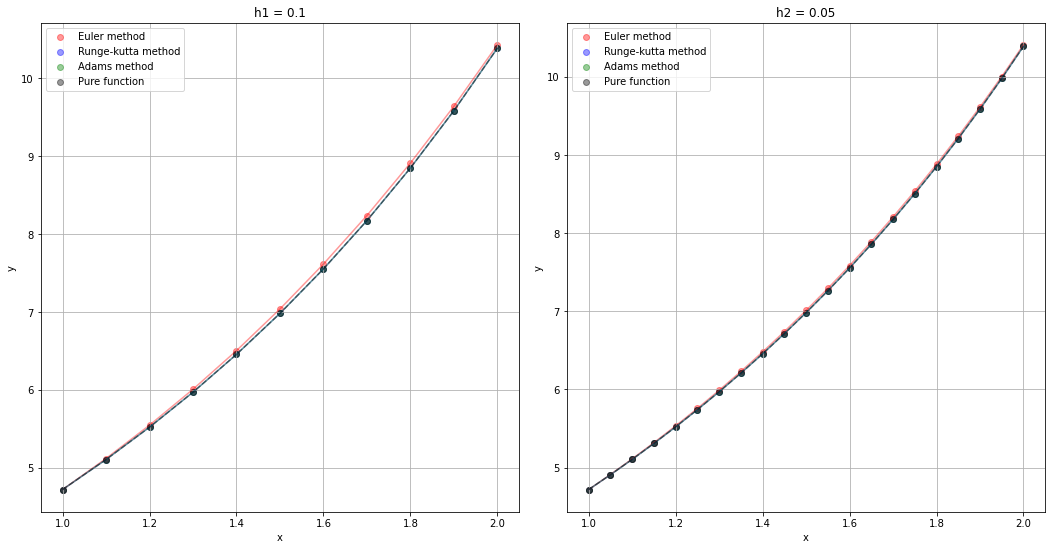

In [ ]:
res = []
pure = []
steps = [h, h/2]
for h in steps:
    x_eul, y_eul = euler(function_of_xyz, a, b, h, y0, z)
    x_rung, y_rung, k_rung = runge_kutta(function_of_xyz, a, b, h, y0, z)
    x_ad, y_ad = adams(function_of_xyz, x_rung, y_rung, k_rung, h)
    x_anal, y_anal = analytical(absolute_solve, a, b, h)

    pure.append((x_anal, y_anal))
    res.append({
                "h": h,
                "Euler": {'x': x_eul, 'y': y_eul},
                "Runge": {'x': x_rung, 'y': y_rung},
                "Adams": {'x': x_ad, 'y': y_ad},
                })

err = runge_romberg(res)
print("Euler error: {0}".format(err['Euler']))
print("Runge error: {0}".format(err['Runge']))
print("Adams error: {0}".format(err['Adams']))

show(res, pure, steps)